In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [36]:
df=pd.read_csv("Social_Network_Ads.csv")
df.sample(4)

,Age,EstimatedSalary,Purchased
31,27,137000,1
34,27,90000,0
292,55,39000,1
241,38,59000,0


<Axes: xlabel='EstimatedSalary', ylabel='Age'>

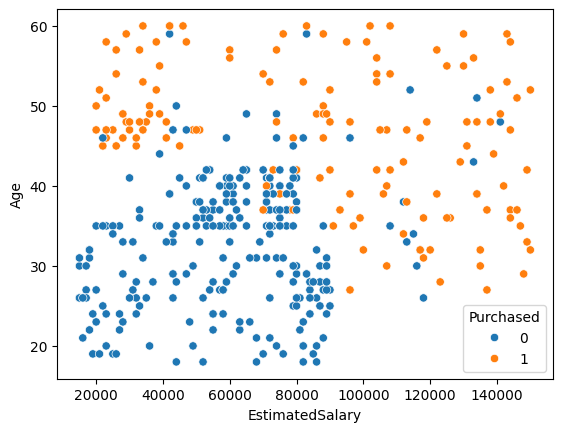

In [6]:
import seaborn as sns 
sns.scatterplot(df,x='EstimatedSalary',y='Age',hue='Purchased')

In [8]:
X=df.drop(columns=['Purchased'])
y=df['Purchased']

In [11]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [14]:
import tensorflow 
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense 


In [17]:
model = Sequential() 
model.add(Dense(128,activation="relu",input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

# traing the model in deep leraing 

<h1>model working </h1>

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4552 - loss: 432.4898 - val_accuracy: 0.6500 - val_loss: 48.8988
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5147 - loss: 65.6276 - val_accuracy: 0.3500 - val_loss: 100.2906
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4117 - loss: 82.5690 - val_accuracy: 0.6500 - val_loss: 51.7955
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5518 - loss: 88.5446 - val_accuracy: 0.6500 - val_loss: 49.5901
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5435 - loss: 67.4818 - val_accuracy: 0.6500 - val_loss: 58.5917
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5402 - loss: 63.9799 - val_accuracy: 0.6500 - val_loss: 31.9564
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4853 - loss: 79.4675 - val_accuracy: 0.3500 - val_loss: 30.3321
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5205 - loss: 34.2312 - 

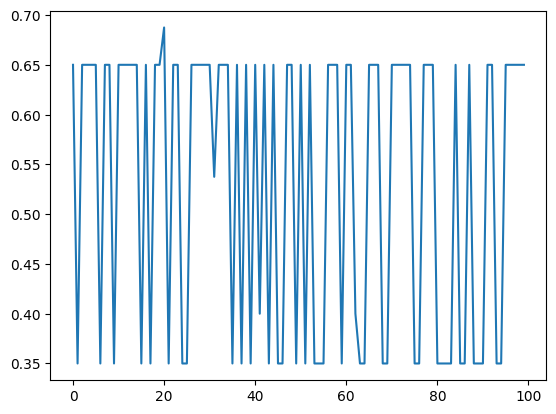

In [23]:
plt.plot(history.history['val_accuracy'])

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
std=StandardScaler()                                         # when to normailize the data --- when you know your min and max value
                                                            # when standrdlzed the data == when you did not know min valu and max value

In [26]:
X_train_scale=std.fit_transform(X_train)
X_test_scale=std.transform(X_test)

In [27]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history=model2.fit(X_train_scale,y_train,validation_data=(X_test_scale,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8989 - loss: 0.2509 - val_accuracy: 0.9375 - val_loss: 0.1773
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9199 - loss: 0.2420 - val_accuracy: 0.9375 - val_loss: 0.1773
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9186 - loss: 0.2278 - val_accuracy: 0.9375 - val_loss: 0.1760
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9301 - loss: 0.2289 - val_accuracy: 0.9375 - val_loss: 0.1758
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9351 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.1761
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9097 - loss: 0.2604 - val_accuracy: 0.9375 - val_loss: 0.1788
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9160 - loss: 0.2191 - val_accuracy: 0.9375 - val_loss: 0.1771
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9044 - loss: 0.2629 - val_accuracy: 0.

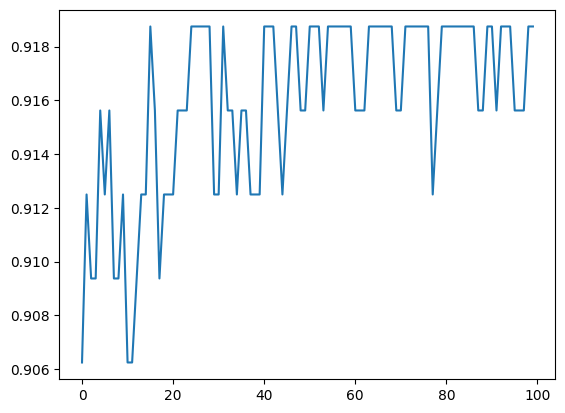

In [35]:
plt.plot(history.history['accuracy'])